<img src="../src/packt-banner.png" alt="">

# Chapter 3: Preparing Data for Predictive Modeling

We explore methods for processing data with Python using Pandas, by running through various examples on a sample dataset.

Then, we introduce the Human Resource Analytics and prepare it for use in training machine learning models.

---

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [2]:
%load_ext watermark
%watermark -d -v -m -p requests,numpy,pandas,matplotlib,seaborn,sklearn

2020-02-12 

CPython 3.7.5
IPython 7.10.1

requests 2.22.0
numpy 1.17.4
pandas 0.25.3
matplotlib 3.1.1
seaborn 0.9.0
sklearn 0.21.3

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


---

## Preparing data for modeling

---

### Merging data

---

In [3]:
pd.merge?

Signature:
pd.merge(
    left,
    right,
    how='inner',
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=False,
    suffixes=('_x', '_y'),
    copy=True,
    indicator=False,
    validate=None,
)
Docstring:
Merge DataFrame or named Series objects with a database-style join.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.

Parameters
----------
left : DataFrame
right : DataFrame or named Series
    Object to merge with.
how : {'left', 'right', 'outer', 'inner'}, default 'inner'
    Type of merge to be performed.

    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order.
    * right: use only keys from right frame, similar to a SQL right outer join;
      preserve key order.
    * outer: use union of keys from both frame

In [4]:
# Build a simple set of tables

df_1 = pd.DataFrame({
    'product': [
        'red shirt', 'red shirt',
        'red shirt', 'white dress',
    ],
    'price': [
        49.33, 49.33, 32.49, 199.99,
    ],
})
df_2 = pd.DataFrame({
    'product': [
        'red shirt', 'blue pants',
        'white tuxedo', 'white dress',
    ],
    'in_stock': [
        True, True, False, False,
    ],
})

In [5]:
df_1

,product,price
0,red shirt,49.33
1,red shirt,49.33
2,red shirt,32.49
3,white dress,199.99


In [6]:
df_2

,product,in_stock
0,red shirt,True
1,blue pants,True
2,white tuxedo,False
3,white dress,False


In [7]:
# Inner merge

df = pd.merge(left=df_1, right=df_2, on='product', how='inner')
df

,product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


In [8]:
# Outer merge

df = pd.merge(left=df_1, right=df_2, on='product', how='outer')
df

,product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


---

### De-duplicating

---

In [9]:
# Standard method

df.drop_duplicates()

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [10]:
# Using masks for more fine tuned control

df.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [11]:
df.duplicated().sum()

1

In [12]:
df[df.duplicated()]

,product,price,in_stock
1,red shirt,49.33,True


In [13]:
df[~(df.duplicated())]

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [14]:
mask = ~(df['product'].duplicated())
df[mask]

,product,price,in_stock
0,red shirt,49.33,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [15]:
# Let's overwrite the DataFrame using drop_duplicates

df.drop_duplicates(inplace=True)
df

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


---

### Handling missing data

---

In [16]:
# Drop the incomplete rows

df.dropna()

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


In [17]:
# Drop the incomplete columns

df.dropna(axis=1)

,product,in_stock
0,red shirt,True
2,red shirt,True
3,white dress,False
4,blue pants,True
5,white tuxedo,False


In [18]:
# DataFrame method for filling missing values

df.fillna?

Signature:
df.fillna(
    value=None,
    method=None,
    axis=None,
    inplace=False,
    limit=None,
    downcast=None,
    **kwargs,
)
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use next valid observation to fill gap.
axis : {0 or 'index', 1 or 'columns'}
    Axis along which to fill missing values.
inplace : bool, default False
    If True, fill in-place. Note: this will modify any
    other views on this objec

In [19]:
df

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [20]:
# Fill with the average

fill_value = df.price.mean()
df.fillna(value=fill_value)

,product,price,in_stock
0,red shirt,49.330000,True
2,red shirt,32.490000,True
3,white dress,199.990000,False
4,blue pants,93.936667,True
5,white tuxedo,93.936667,False


In [21]:
# Fill with the previous value in that column

df.fillna(method='pad')

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,199.99,True
5,white tuxedo,199.99,False


In [22]:
# Let's fill the data using the average

df = df.fillna(value=df.price.mean())

---

### Building training data sets

---

In [23]:
# First, let's create a new column. This will allow
# us to explore more data transformation techniques

ratings = ['low', 'medium', 'high']
np.random.seed(2)
df['rating'] = np.random.choice(ratings, len(df))
df

,product,price,in_stock,rating
0,red shirt,49.330000,True,low
2,red shirt,32.490000,True,medium
3,white dress,199.990000,False,low
4,blue pants,93.936667,True,high
5,white tuxedo,93.936667,False,high


In [24]:
# Convert in_stock to binary

df.in_stock = df.in_stock.map({False: 0, True: 1})
df

,product,price,in_stock,rating
0,red shirt,49.330000,1,low
2,red shirt,32.490000,1,medium
3,white dress,199.990000,0,low
4,blue pants,93.936667,1,high
5,white tuxedo,93.936667,0,high


In [25]:
# Encode ordinal labels

from sklearn.preprocessing import LabelEncoder
rating_encoder = LabelEncoder()
df.rating = rating_encoder.fit_transform(df.rating)
df

,product,price,in_stock,rating
0,red shirt,49.330000,1,1
2,red shirt,32.490000,1,2
3,white dress,199.990000,0,1
4,blue pants,93.936667,1,0
5,white tuxedo,93.936667,0,0


In [26]:
# Convert back if needed

rating_encoder.inverse_transform(df.rating)

array(['low', 'medium', 'low', 'high', 'high'], dtype=object)

In [27]:
# Let's apply the backwards conversion and then try a different mapping technique

df.rating = rating_encoder.inverse_transform(df.rating)
df

,product,price,in_stock,rating
0,red shirt,49.330000,1,low
2,red shirt,32.490000,1,medium
3,white dress,199.990000,0,low
4,blue pants,93.936667,1,high
5,white tuxedo,93.936667,0,high


In [28]:
# Encode the odrinal labels properly using a custom mapping

ordinal_map = {
    rating: index
    for index, rating in enumerate(['low', 'medium', 'high'])
}
print(ordinal_map)
df.rating = df.rating.map(ordinal_map)
df

{'low': 0, 'medium': 1, 'high': 2}


,product,price,in_stock,rating
0,red shirt,49.330000,1,0
2,red shirt,32.490000,1,1
3,white dress,199.990000,0,0
4,blue pants,93.936667,1,2
5,white tuxedo,93.936667,0,2


In [29]:
# One-hot-encode the product feature

df = pd.get_dummies(df)
df

,price,in_stock,rating,product_blue pants,product_red shirt,product_white dress,product_white tuxedo
0,49.330000,1,0,0,1,0,0
2,32.490000,1,1,0,1,0,0
3,199.990000,0,0,0,0,1,0
4,93.936667,1,2,1,0,0,0
5,93.936667,0,2,0,0,0,1


In [30]:
# Split into training and testing sets

features = [
    'price', 'rating',
    'product_blue pants', 'product_red shirt',
    'product_white dress', 'product_white tuxedo',
]
X = df[features].values

target = 'in_stock'
y = df[target].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.3)
)
    
print('Data Shapes')
print('--------------')
print('X_train', X_train.shape)
print('X_test ', X_test.shape)
print('y_train', y_train.shape)
print('y_test ', y_test.shape)

Data Shapes
--------------
X_train (3, 6)
X_test  (2, 6)
y_train (3,)
y_test  (2,)


---

### Activity: Preparing to train a predictive model for the employee retention problem

_Note: If desired, the following code can be removed from the student version of the notebook and replaced with empty cells._

---

#### Read the data

In [31]:
%%bash
head ../data/hr-analytics/hr_data.csv

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0.38,0.53,2,157,3,0,yes,0,,sales,low
0.8,0.86,5,262,6,0,yes,0,yes,sales,medium
0.11,0.88,7,272,4,0,yes,0,,sales,medium
0.72,0.87,5,223,5,0,yes,0,,sales,low
0.37,0.52,2,,,0,yes,0,no,sales,low
0.41,0.5,2,,,0,yes,0,,sales,low
0.1,0.77,6,247,4,0,yes,0,,sales,low
0.92,0.85,5,259,5,0,yes,0,,sales,low
0.89,1,5,224,5,0,yes,0,,sales,low


In [32]:
with open('../data/hr-analytics/hr_data.csv', 'r') as f:
    for _ in range(10):
        print(next(f).strip())

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0.38,0.53,2,157,3,0,yes,0,,sales,low
0.8,0.86,5,262,6,0,yes,0,yes,sales,medium
0.11,0.88,7,272,4,0,yes,0,,sales,medium
0.72,0.87,5,223,5,0,yes,0,,sales,low
0.37,0.52,2,,,0,yes,0,no,sales,low
0.41,0.5,2,,,0,yes,0,,sales,low
0.1,0.77,6,247,4,0,yes,0,,sales,low
0.92,0.85,5,259,5,0,yes,0,,sales,low
0.89,1,5,224,5,0,yes,0,,sales,low


In [33]:
df = pd.read_csv('../data/hr-analytics/hr_data.csv')

In [34]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [35]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [36]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


In [37]:
# How many lines in the CSV (including header)

with open('../data/hr-analytics/hr_data.csv') as f:
    num_lines = len([
        line for line in f.read().splitlines()
        if line.strip()
    ])
    
num_lines

15000

In [38]:
# How many records did we load into Python?

len(df)

14999

---

**Assess the target**

In [39]:
df.left.value_counts()

no     11428
yes     3571
Name: left, dtype: int64

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


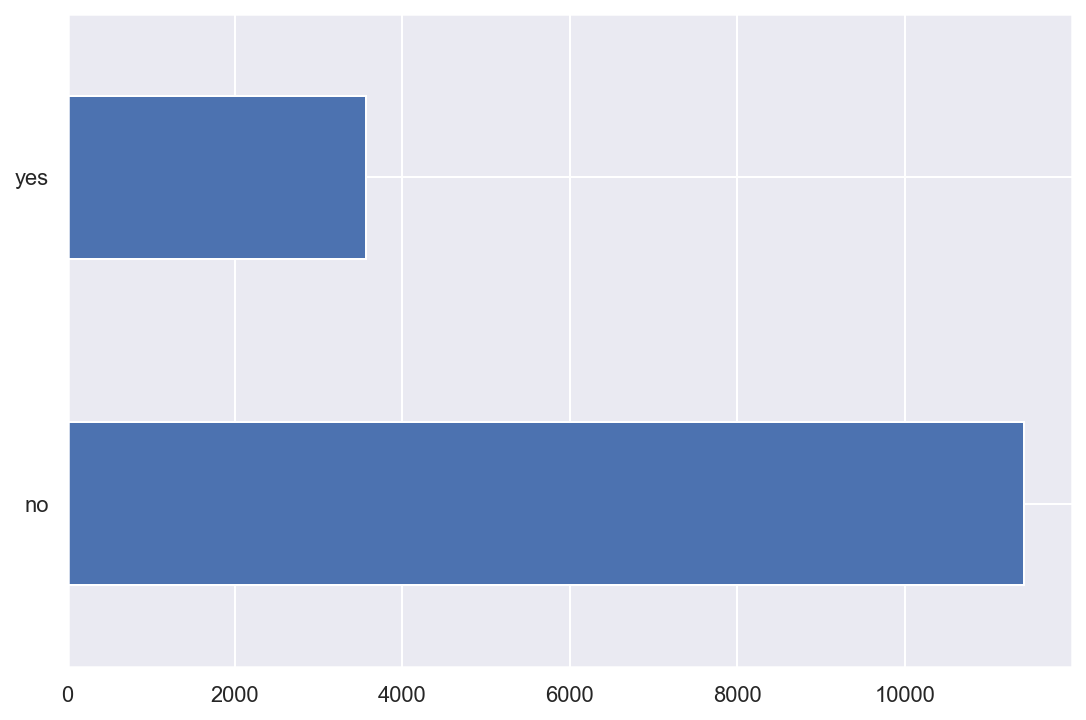

In [40]:
# How is it distributed?

df.left.value_counts().plot('barh')
plt.show()

In [41]:
# How much missing data?

df.left.isnull().sum()

0

---

**Assess the features**

In [42]:
# Print datatypes

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

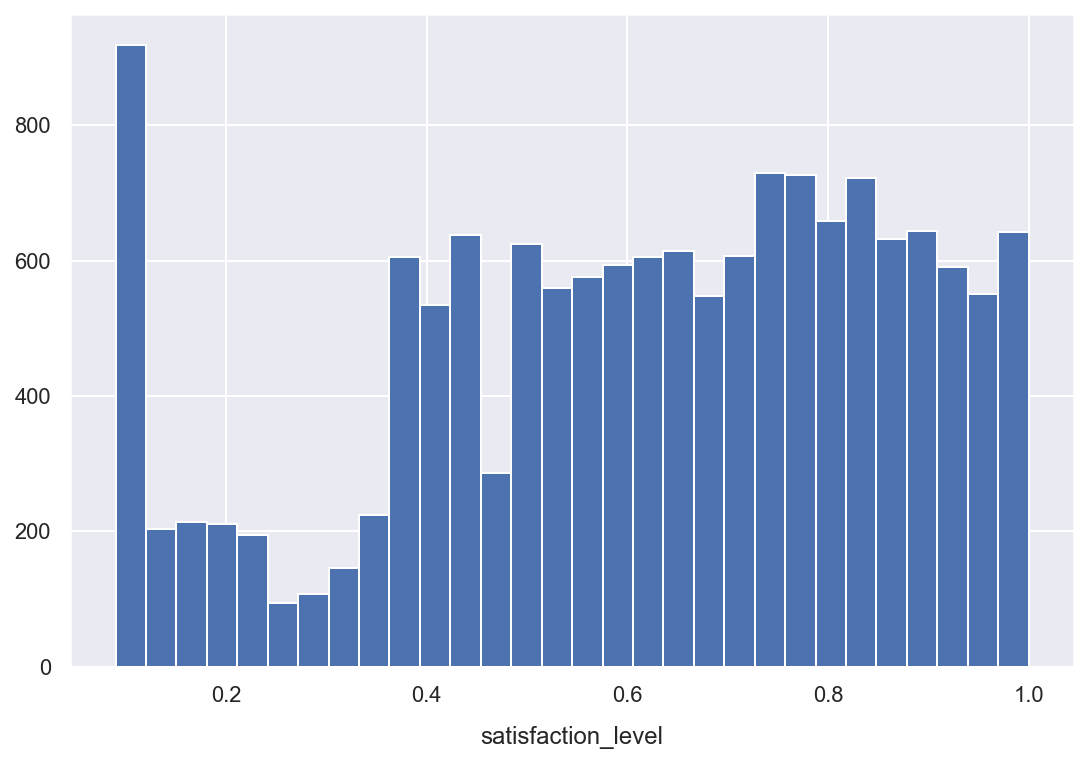

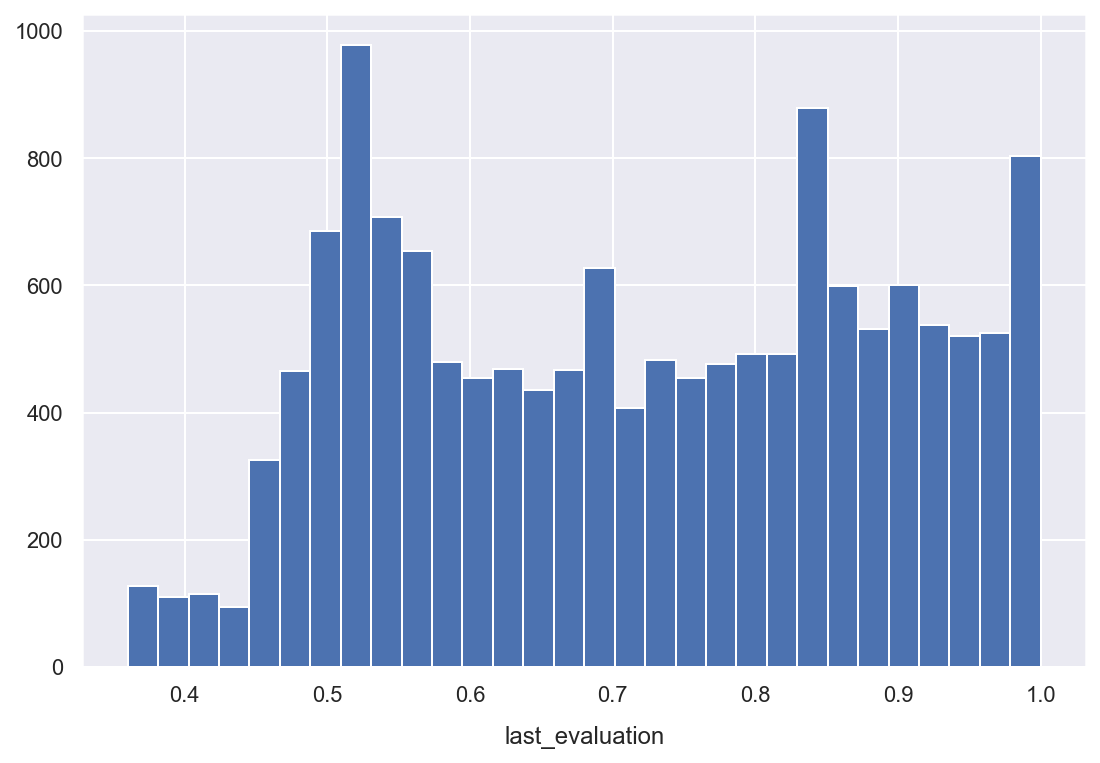

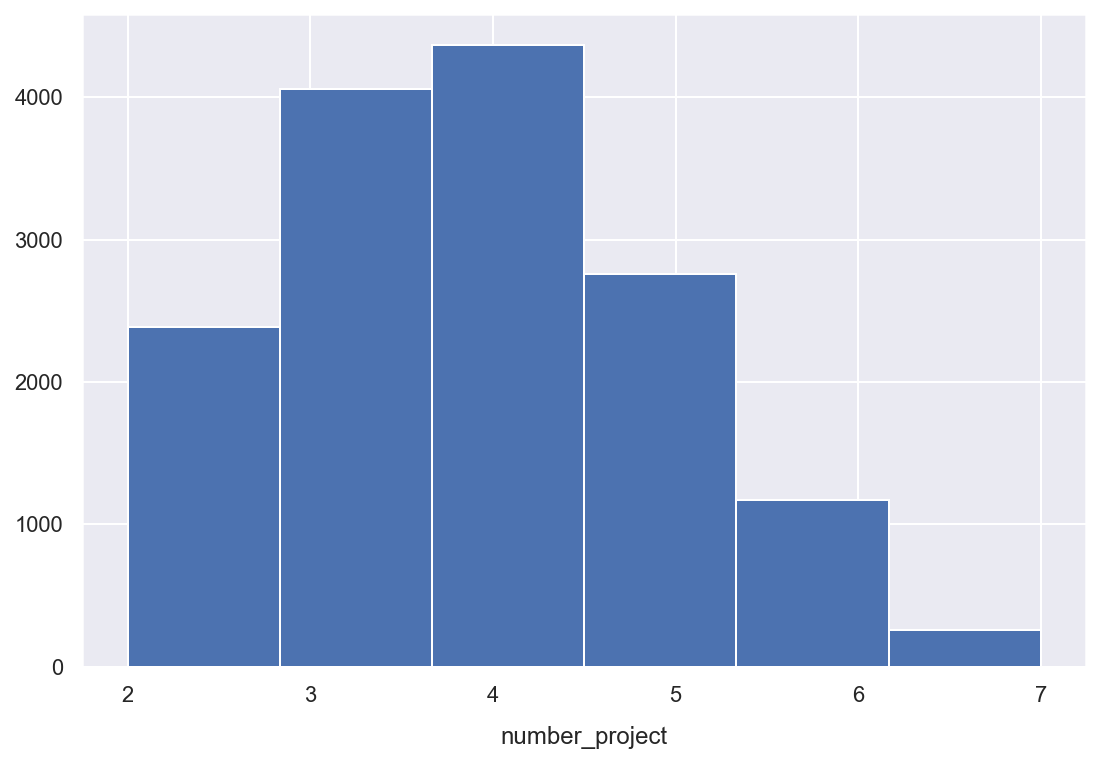

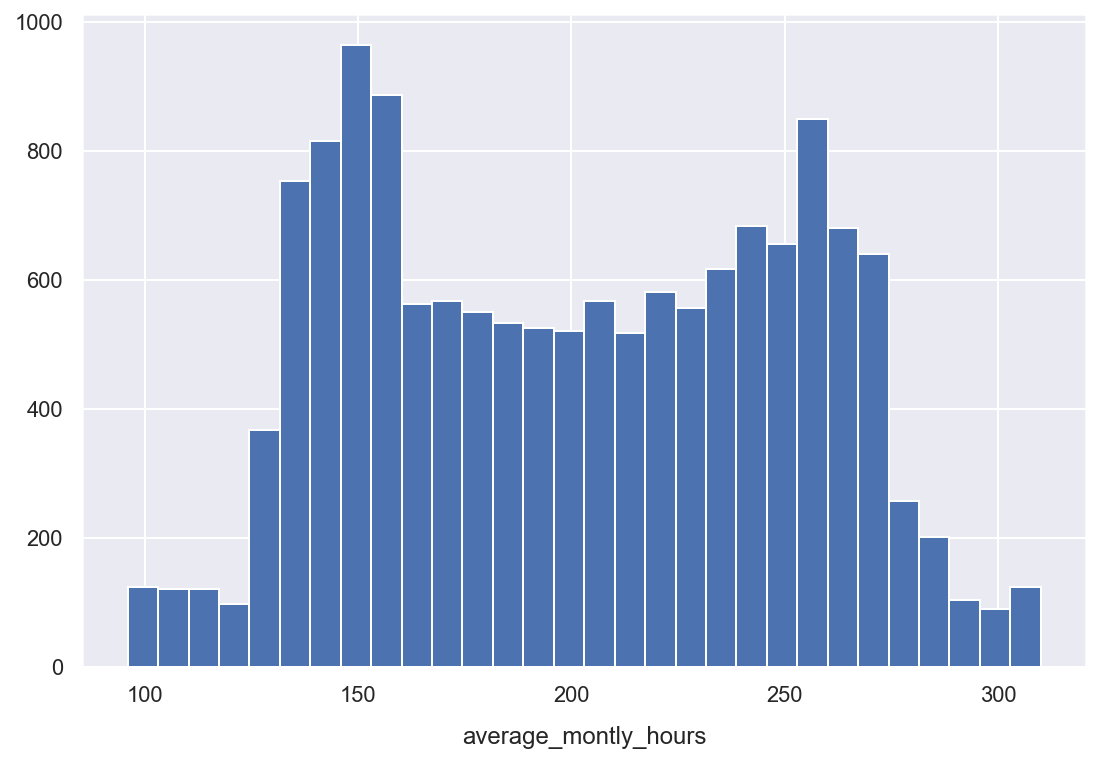

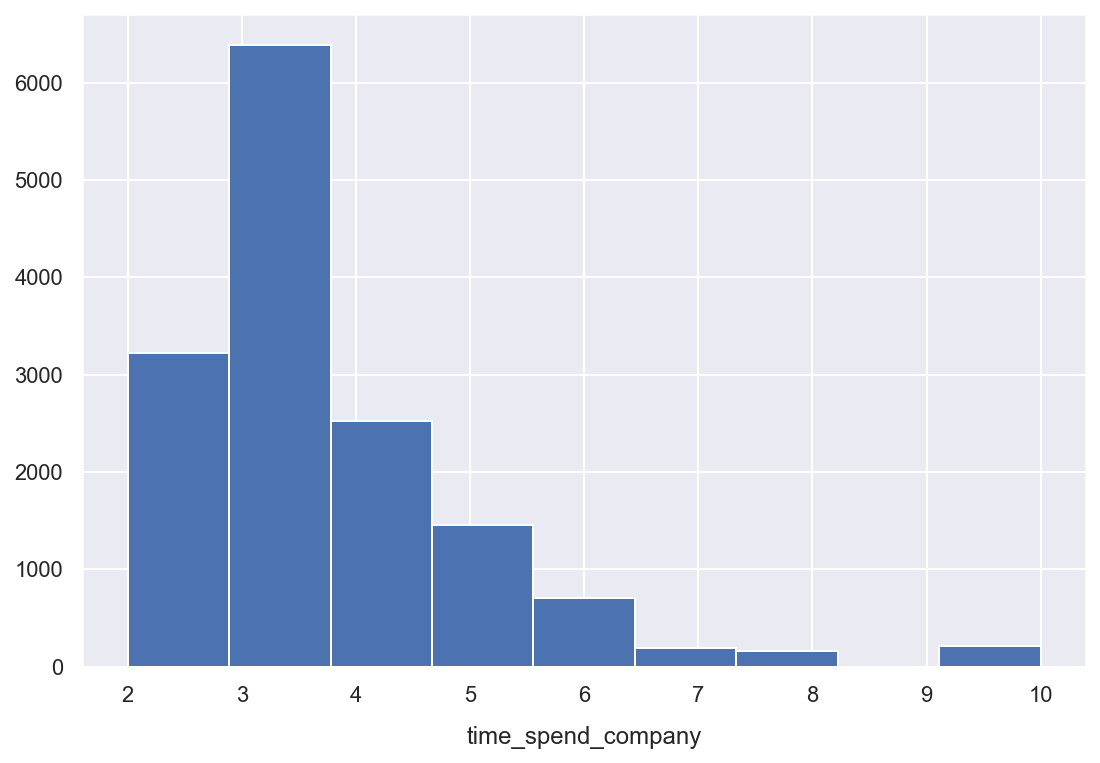

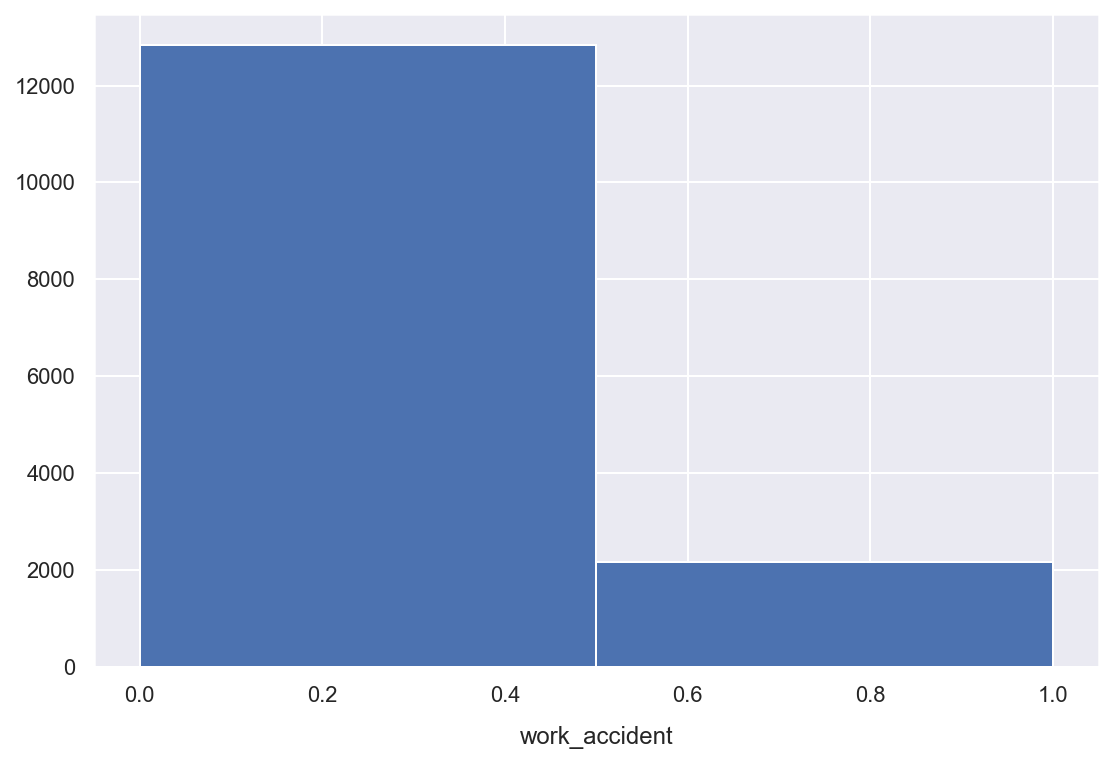

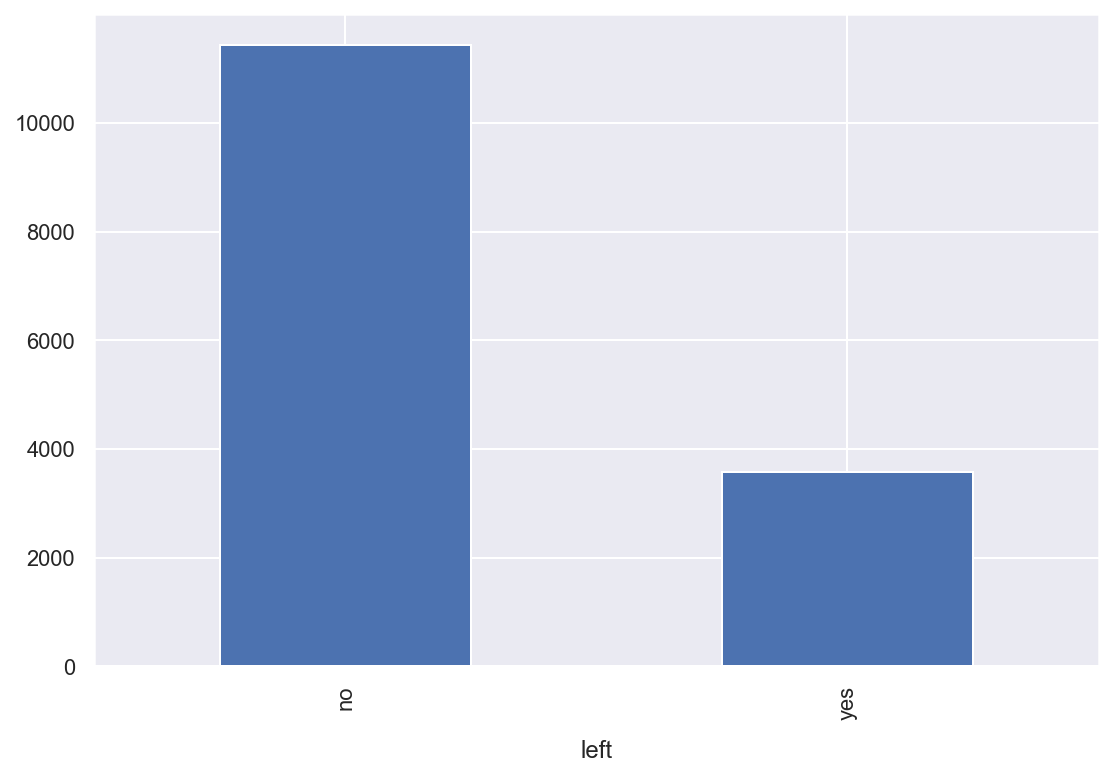

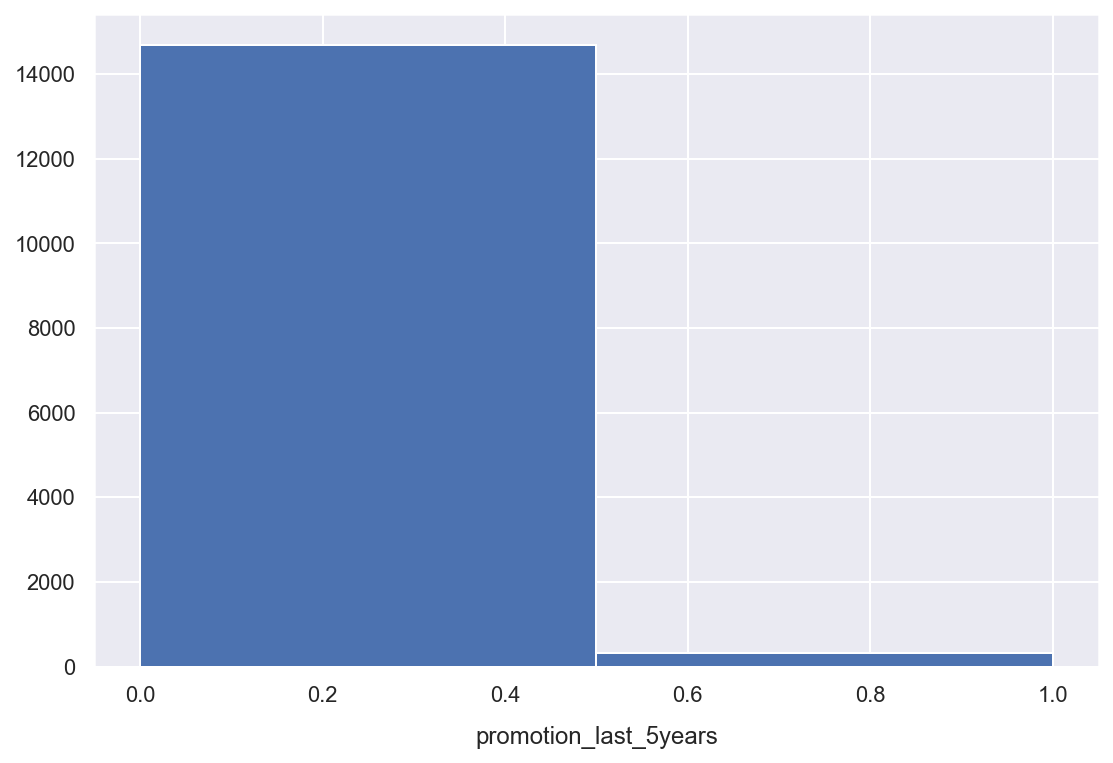

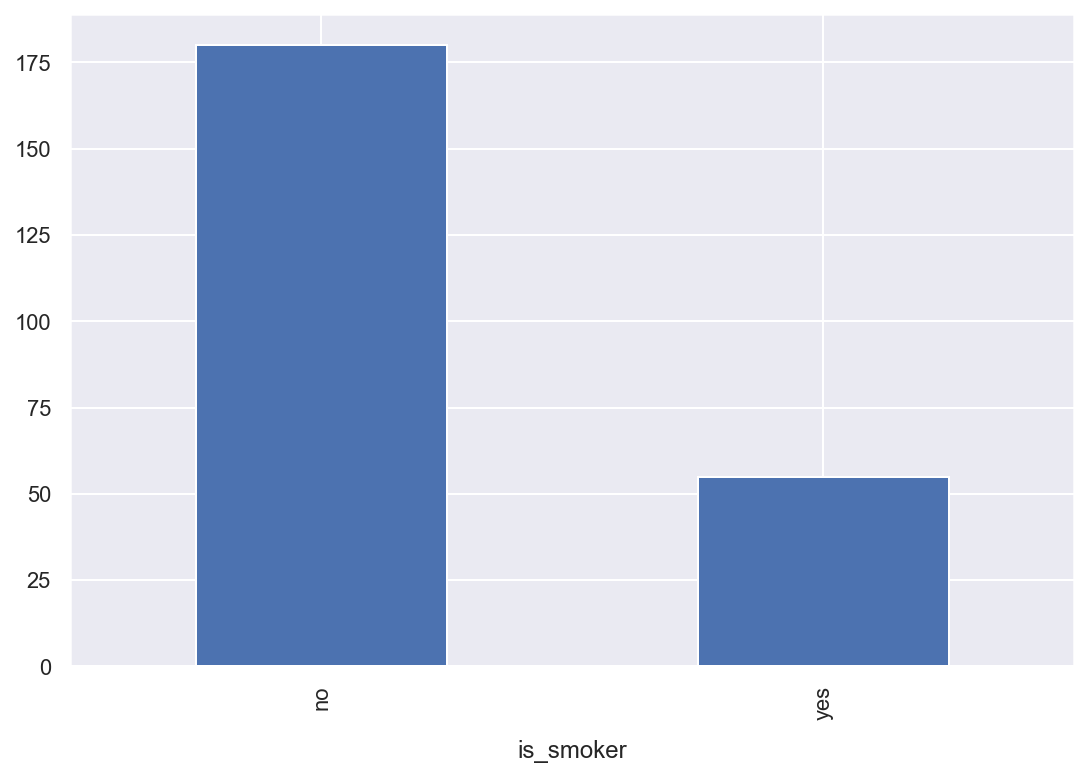

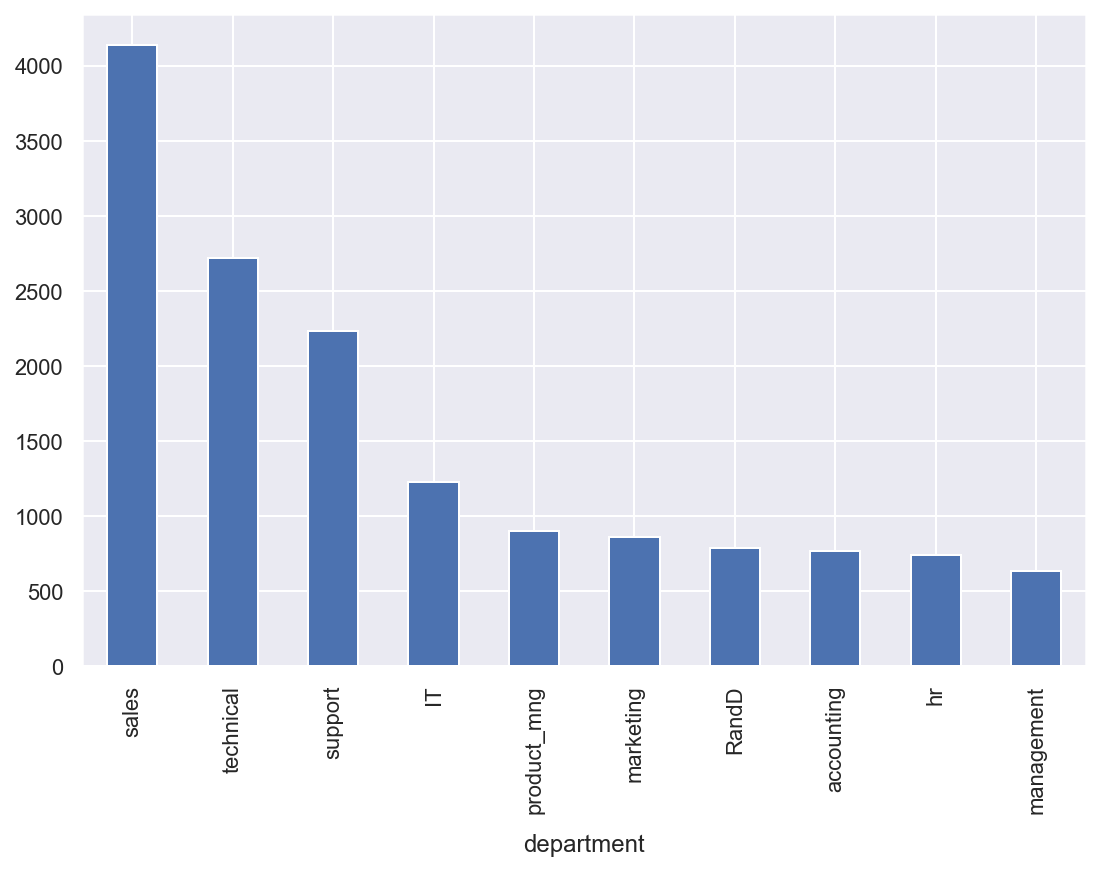

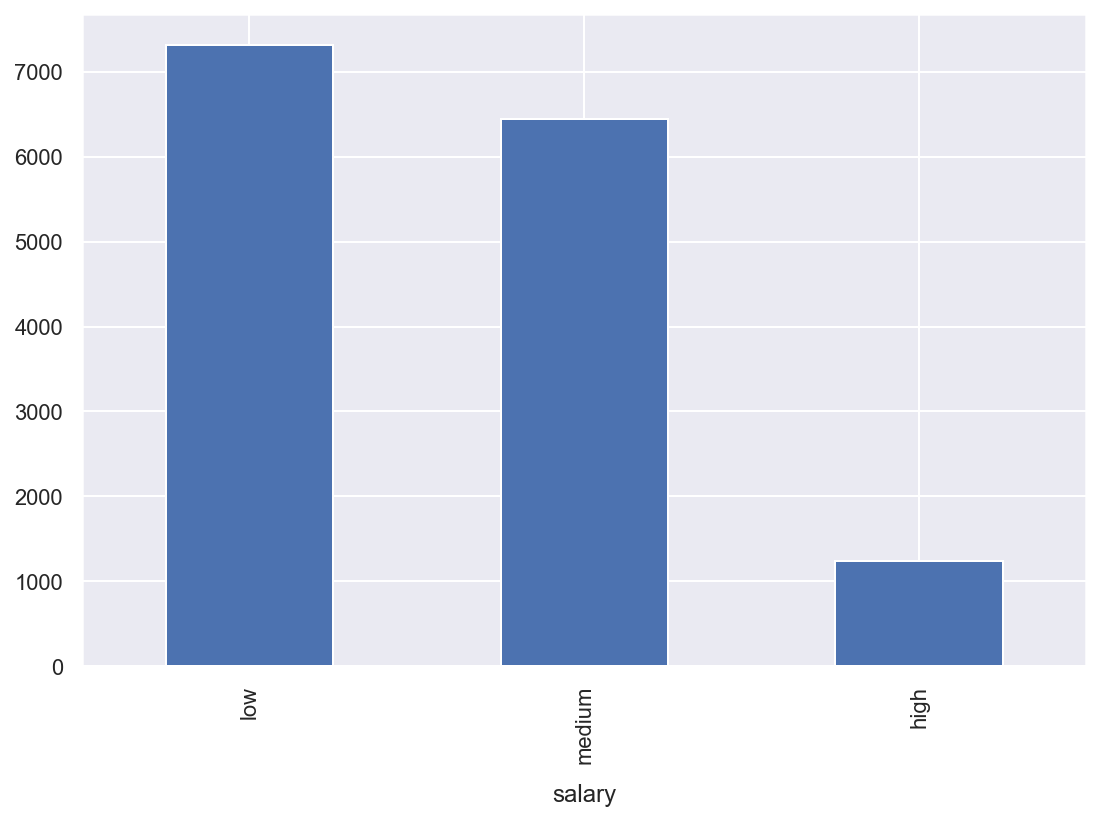

In [43]:
# Print the distibutions

for f in df.columns:
    fig = plt.figure()
    s = df[f]
    if s.dtype in ('float', 'int'):
        num_bins = min((30, len(df[f].unique())))
        s.hist(bins=num_bins)
    else:
        s.value_counts().plot.bar()    
    plt.xlabel(f)

In [44]:
# How many NaNs?

df.isnull().sum() / len(df) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

In [45]:
# Remove is_smoker

del df['is_smoker']

In [46]:
# Fill time_spend_company
fill_value = df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(fill_value)

In [47]:
df.isnull().sum() / len(df) * 100

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     2.453497
time_spend_company       0.000000
work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

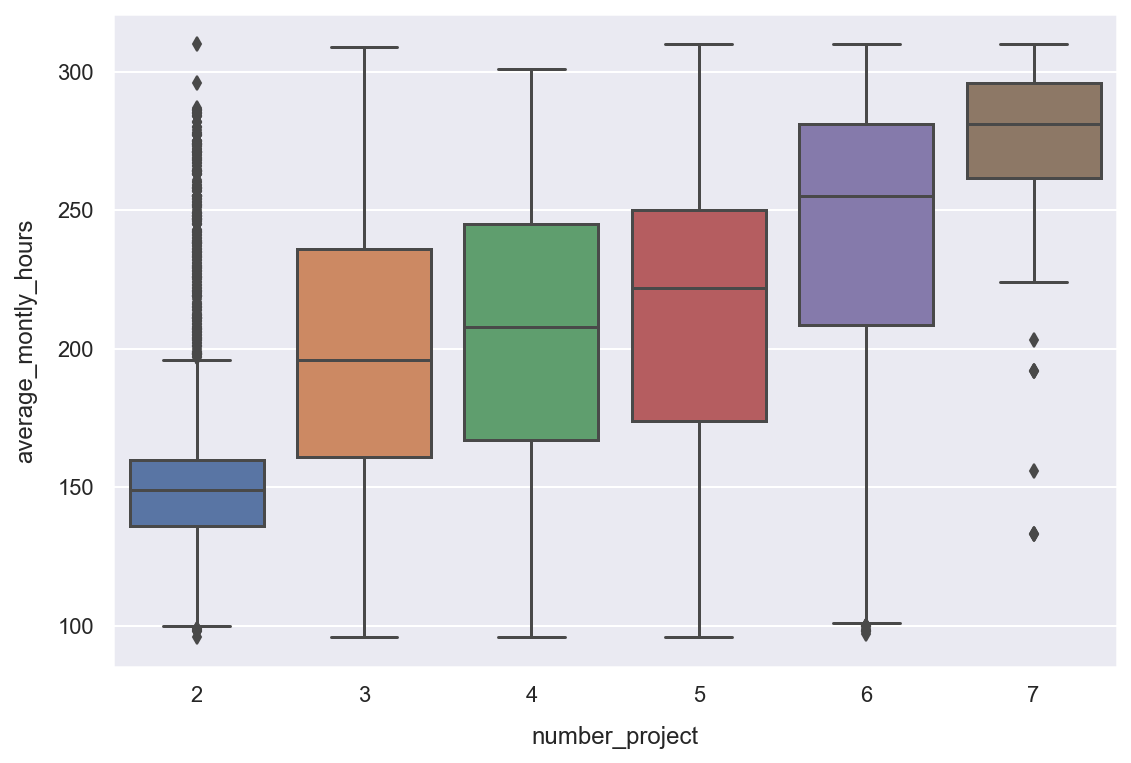

In [48]:
# How does average_montly_hours depend on number_project

sns.boxplot(
    x='number_project',
    y='average_montly_hours',
    data=df
)
plt.savefig(
    '../figures/chapter-3-hr-analytics-hours-num-proj-boxplot.png',
    bbox_inches='tight',
    dpi=300,
)

In [49]:
# Calculate fill values for average_montly_hours

mean_per_project = (
    df.groupby('number_project')
    .average_montly_hours
    .mean()
)
mean_per_project = dict(mean_per_project)
mean_per_project

{2: 160.16353543979506,
 3: 197.47882323104236,
 4: 205.07858315740089,
 5: 211.99962839093274,
 6: 238.73947368421054,
 7: 276.015873015873}

In [50]:
# Fill average_monthly_hours with the appropriate values

fill_values = df.number_project.map(mean_per_project)
df.average_montly_hours = (
    df.average_montly_hours
    .fillna(fill_values)
)

In [51]:
# Make sure we are all clear of NaNs

assert df.isnull().sum().sum() == 0

In [52]:
# Convert categorical features to binary integer representation

df.left = df.left.map({'no': 0, 'yes': 1})
df = pd.get_dummies(df)

In [53]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [54]:
# Save to file

df.to_csv('../data/hr-analytics/hr_data_processed.csv', index=False)

---